# Import Necessary Libraries:

In [91]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Dataset

In [5]:
# Load the dataset
df = pd.read_csv('real-estate-sales.csv')

# Display the first few rows to ensure the data loaded correctly
df.head()

PropertyID  xrCompositeLandUseID  xrBuildingTypeID     ParcelID  \
0          30                     3               4.0  144-698-048   
1          50                     3               4.0  121-698-073   
2          58                     3               6.0  121-699-090   
3          66                     3               6.0  144-699-037   
4          78                     3               3.0  144-699-025   

   LocationStartNumber ApartmentUnitNumber StreetNameAndWay  \
0                 22.0                 NaN       BRISTOL ST   
1                164.0                 NaN    HOLLYWOOD AVE   
2                 87.0                 NaN       BRISTOL ST   
3                 55.0                 NaN       BRISTOL ST   
4                  5.0                 NaN       BRISTOL ST   

   xrPrimaryNeighborhoodID  LandSF  TotalFinishedArea  LivingUnits  \
0                        2  6000.0             1422.0          1.0   
1                        2  5650.0             1384.0          1.0   
2                        2  5850.0             1249.0          1.0   
3                        2  5900.0             1390.0          1.0   
4                        2  7788.0              960.0          1.0   

               OwnerLastName OwnerFirstName              PrimaryGrantor  \
0                       KHAN           BIBI                 ALI MUNTAAZ   
1                   GONZALEZ        LOURDES           GONZALEZ JOHNETTE   
2                    SAMPAYO         YARLIS        FLOYD ANNIE J ESTATE   
3           CARRILLO PACHECO        RICARDO            HARGROVE DAVID L   
4  VARJABEDIAN ROSE M (L.U.)            NaN  VARJABEDIAN ANTHONY ( L U)   

     SaleDate  SalePrice  TotalAppraisedValue LegalReference  \
0  12/10/2019          0               136600     07559-0116   
1  12/18/2019     179900               158400     07561-0225   
2  05/24/2019     174900               144400     07485-0035   
3  09/10/2019     140000               142400     07523-0330   
4  05/14/2020          0               147900     07616-0064   

   xrSalesValidityID  xrDeedID  
0                  5         8  
1                  1        10  
2                 12         1  
3                  1        10  
4                 11         7

# Question 1

**Randomly Select 100 Samples**

In [10]:
# Randomly select 100 samples
sample_df = df.sample(n=100, random_state=1)

# Check the sample
sample_df.head()

PropertyID  xrCompositeLandUseID  xrBuildingTypeID     ParcelID  \
2209       13651                     7              18.0  249-557-354   
881         5287                     5              12.0  227-541-140   
1615        8296                    92              22.0  278-816-120   
1608        8210                     3               8.0  275-688-086   
4095       26953                   457              16.0  134-387-239   

      LocationStartNumber ApartmentUnitNumber  StreetNameAndWay  \
2209                 64.0                0402       CONGRESS ST   
881                 223.0                 NaN      JEFFERSON ST   
1615                918.0                 NaN  WETHERSFIELD AVE   
1608                 17.0                 NaN         CHAPIN PL   
4095                 30.0                 207     EVERGREEN AVE   

      xrPrimaryNeighborhoodID   LandSF  TotalFinishedArea  LivingUnits  \
2209                      275      NaN              970.0          1.0   
881                       115   3125.0             2835.0          3.0   
1615                       58  14080.0             7082.0          0.0   
1608                       45   3250.0             2414.0          1.0   
4095                      428      0.0              603.0          1.0   

                     OwnerLastName OwnerFirstName  \
2209                        COOPER       BRITTANY   
881   CONSTITUTION REAL ESTATE LLC            NaN   
1615         ASDS REALTY GROUP LLC            NaN   
1608                          LUNA       GLORIBEL   
4095             SBM EVERGREEN LLC            NaN   

                     PrimaryGrantor    SaleDate  SalePrice  \
2209                    NOLAN ELENA  08/07/2020      60000   
881        GORILLA CAPITAL FUND LLC  11/07/2019      80000   
1615    918 WETERSFILED AVENUE, LLC  11/20/2018     265000   
1608     BAYVIEW LOAN SERVICING LLC  03/14/2019          0   
4095  CARRIAGE PLACE APARTMENTS LLC  12/17/2019    2135000   

      TotalAppraisedValue LegalReference  xrSalesValidityID  xrDeedID  
2209                74000     07643-0258                  1        10  
881                 73500     07549-0018                 26        11  
1615               252900     07418-0199                  1        10  
1608               109900     07457-0057                  5         8  
4095                36900     07561-0163                 25        19

**Below is our selected variable**

1. SalePrice

**Hypothesis Testing for Mean (SalePrice)**

**Define Hypothesis:**

- Null Hypothesis (H₀): The mean sale price = $150,000

- Alternative Hypothesis (H₁): The mean sale price ≠ $150,000

**Perform a One-Sample t-test**

In [15]:
# Define hypothesized mean value
hypothesized_mean = 150000

# Calculate the sample mean and sample standard deviation
sample_mean = sample_df['SalePrice'].mean()
sample_std = sample_df['SalePrice'].std(ddof=1)  # using sample standard deviation

# Perform the t-test
t_stat, p_value = stats.ttest_1samp(sample_df['SalePrice'], hypothesized_mean)

print(f"Sample Mean: {sample_mean}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Sample Mean: 717989.47
T-statistic: 3.8591611537917023
P-value: 0.00020281194201561062


**Proportion Hypothesis Test for SalePrice Greater Than or Equal to 150,000**

For the proportion hypothesis test, we can define a "success" as any SalePrice greater than or equal to $150,000, with a hypothesized proportion of 0.5.

**Define Hypothesis**

- Null Hypothesis (H₀): The proportion of properties with a sale price ≥ $150,000 = 0.5
- 
- Alternative Hypothesis (H₁): The proportion of properties with a sale price ≥ $150,000 ≠ 0.5

**Perform Proportion Test**

In [47]:
# Count the number of "successes" (SalePrice ≥ 150,000)
success_count = (sample_df['SalePrice'] >= 150000).sum()
total_count = len(sample_df)

# Calculate the sample proportion
sample_proportion = success_count / total_count

# Define hypothesized proportion
hypothesized_proportion = 0.5

# Perform the proportion test
z_stat, p_value_prop = proportions_ztest(count=success_count, nobs=total_count, value=hypothesized_proportion)

print(f"Sample Proportion of SalePrice ≥ 150,000: {sample_proportion}")
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value_prop}")

Sample Proportion of SalePrice ≥ 150,000: 0.45
Z-statistic: -1.0050378152592119
P-value: 0.31487864133641996


**Confidence Intervals**

**Confidence Interval for Mean (SalePrice)**

In [51]:
# Calculate the 95% confidence interval for the mean
confidence_level = 0.95
degrees_freedom = total_count - 1
confidence_interval_mean = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_std / np.sqrt(total_count))

print(f"95% Confidence Interval for Mean Sale Price: {confidence_interval_mean}")

95% Confidence Interval for Mean Sale Price: (425953.379839547, 1010025.560160453)


**Confidence Interval for Proportion (SalePrice ≥ 150,000)**

In [62]:
# Calculate the 95% confidence interval for the proportion
ci_low, ci_high = proportion_confint(success_count, total_count, alpha=0.05, method='normal')

print(f"95% Confidence Interval for Proportion of SalePrice ≥ 150,000: ({ci_low}, {ci_high})")

95% Confidence Interval for Proportion of SalePrice ≥ 150,000: (0.3524930229100606, 0.5475069770899395)


# Question 2

To compare two sample means and standard deviations, we’ll select two variables from the dataset and conduct a hypothesis test to see if there’s a significant difference between their means. Then, we’ll calculate the 95% confidence interval for the difference in means.

Since the dataset includes various numerical variables, let’s use LandSF (land square footage) and TotalFinishedArea (total finished area) for comparison

**Hypothesis Setup**
  
- Null Hypothesis (H₀): The mean of LandSF is equal to the mean of TotalFinishedArea.

- Alternative Hypothesis (H₁): The mean of LandSF is not equal to the mean of TotalFinishedArea.

**Calculate Sample Means and Standard Deviations**

To compare the two sample means and standard deviations, we’ll:

- Calculate the means and standard deviations for LandSF and TotalFinishedArea.
- Perform an independent two-sample t-test.
- Calculate the 95% confidence interval for the difference in means.

In [67]:
# Calculate sample statistics
landsf_mean = sample_df['LandSF'].mean()
landsf_std = sample_df['LandSF'].std(ddof=1)
total_finished_area_mean = sample_df['TotalFinishedArea'].mean()
total_finished_area_std = sample_df['TotalFinishedArea'].std(ddof=1)

print(f"Mean of LandSF: {landsf_mean}")
print(f"Standard Deviation of LandSF: {landsf_std}")
print(f"Mean of TotalFinishedArea: {total_finished_area_mean}")
print(f"Standard Deviation of TotalFinishedArea: {total_finished_area_std}")

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(sample_df['LandSF'], sample_df['TotalFinishedArea'], equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Calculate 95% confidence interval for the difference in means
confidence_level = 0.95
difference_in_means = landsf_mean - total_finished_area_mean
pooled_std_error = np.sqrt((landsf_std**2 / len(sample_df)) + (total_finished_area_std**2 / len(sample_df)))
ci_low = difference_in_means - stats.t.ppf((1 + confidence_level) / 2, df=len(sample_df)-1) * pooled_std_error
ci_high = difference_in_means + stats.t.ppf((1 + confidence_level) / 2, df=len(sample_df)-1) * pooled_std_error

print(f"95% Confidence Interval for Difference in Means: ({ci_low}, {ci_high})")

Mean of LandSF: 7946.840909090909
Standard Deviation of LandSF: 26567.74998795862
Mean of TotalFinishedArea: 7426.617526391753
Standard Deviation of TotalFinishedArea: 39899.063063882255
T-statistic: nan
P-value: nan
95% Confidence Interval for Difference in Means: (-8991.15440926005, 10031.601174658363)


# Question 3

we need to calculate the correlation between SalePrice (your variable) and the two other variables LandSF and TotalFinishedArea, perform a hypothesis test for the correlation, and calculate a confidence interval for the correlation coefficient.

In [75]:
# Fill NaN values with the mean of the respective columns
sample_df['SalePrice'] = sample_df['SalePrice'].fillna(sample_df['SalePrice'].mean())
sample_df['LandSF'] = sample_df['LandSF'].fillna(sample_df['LandSF'].mean())
sample_df['TotalFinishedArea'] = sample_df['TotalFinishedArea'].fillna(sample_df['TotalFinishedArea'].mean())

# Calculate Pearson correlation between SalePrice and LandSF
correlation_landSF, p_value_corr_landSF = stats.pearsonr(sample_df['SalePrice'], sample_df['LandSF'])

# Perform hypothesis test for correlation (H0: rho = 0)
# Null Hypothesis: There is no correlation between SalePrice and LandSF
# Alternative Hypothesis: There is a correlation between SalePrice and LandSF

print(f"Correlation coefficient between SalePrice and LandSF: {correlation_landSF}")
print(f"P-value for the correlation test (SalePrice vs LandSF): {p_value_corr_landSF}")

# Confidence Interval for the correlation coefficient between SalePrice and LandSF using Fisher's Z-transformation
z_landSF = 0.5 * np.log((1 + correlation_landSF) / (1 - correlation_landSF))
se_landSF = 1 / np.sqrt(len(sample_df) - 3)
z_critical = stats.norm.ppf(0.975)  # Z-critical value for 95% CI
z_low_landSF = z_landSF - z_critical * se_landSF
z_high_landSF = z_landSF + z_critical * se_landSF

# Convert the Z interval back to the correlation coefficient scale
correlation_low_landSF = (np.exp(2 * z_low_landSF) - 1) / (np.exp(2 * z_low_landSF) + 1)
correlation_high_landSF = (np.exp(2 * z_high_landSF) - 1) / (np.exp(2 * z_high_landSF) + 1)

print(f"95% Confidence Interval for the Correlation Coefficient (SalePrice vs LandSF): ({correlation_low_landSF}, {correlation_high_landSF})")

# Calculate Pearson correlation between SalePrice and TotalFinishedArea
correlation_totalFinishedArea, p_value_corr_totalFinishedArea = stats.pearsonr(sample_df['SalePrice'], sample_df['TotalFinishedArea'])

# Perform hypothesis test for correlation (H0: rho = 0)
# Null Hypothesis: There is no correlation between SalePrice and TotalFinishedArea
# Alternative Hypothesis: There is a correlation between SalePrice and TotalFinishedArea

print(f"Correlation coefficient between SalePrice and TotalFinishedArea: {correlation_totalFinishedArea}")
print(f"P-value for the correlation test (SalePrice vs TotalFinishedArea): {p_value_corr_totalFinishedArea}")

# Confidence Interval for the correlation coefficient between SalePrice and TotalFinishedArea using Fisher's Z-transformation
z_totalFinishedArea = 0.5 * np.log((1 + correlation_totalFinishedArea) / (1 - correlation_totalFinishedArea))
se_totalFinishedArea = 1 / np.sqrt(len(sample_df) - 3)
z_low_totalFinishedArea = z_totalFinishedArea - z_critical * se_totalFinishedArea
z_high_totalFinishedArea = z_totalFinishedArea + z_critical * se_totalFinishedArea

# Convert the Z interval back to the correlation coefficient scale
correlation_low_totalFinishedArea = (np.exp(2 * z_low_totalFinishedArea) - 1) / (np.exp(2 * z_low_totalFinishedArea) + 1)
correlation_high_totalFinishedArea = (np.exp(2 * z_high_totalFinishedArea) - 1) / (np.exp(2 * z_high_totalFinishedArea) + 1)

print(f"95% Confidence Interval for the Correlation Coefficient (SalePrice vs TotalFinishedArea): ({correlation_low_totalFinishedArea}, {correlation_high_totalFinishedArea})")

Correlation coefficient between SalePrice and LandSF: -0.13756464622694123
P-value for the correlation test (SalePrice vs LandSF): 0.17230031327542708
95% Confidence Interval for the Correlation Coefficient (SalePrice vs LandSF): (-0.32519590902685774, 0.06048786499162529)
Correlation coefficient between SalePrice and TotalFinishedArea: -0.002660950589473876
P-value for the correlation test (SalePrice vs TotalFinishedArea): 0.9790379942651837
95% Confidence Interval for the Correlation Coefficient (SalePrice vs TotalFinishedArea): (-0.19897507217798166, 0.1938584889583489)


# Question 4

Here, we perform linear regression with SalePrice as the target variable and LandSF and TotalFinishedArea as predictor variables

Linear Regression Equation: SalePrice = 1114348.41 + (-116.24 * LandSF) + (71.01 * TotalFinishedArea)
R-squared: 0.2655
Mean Squared Error: 1575070539701.7356


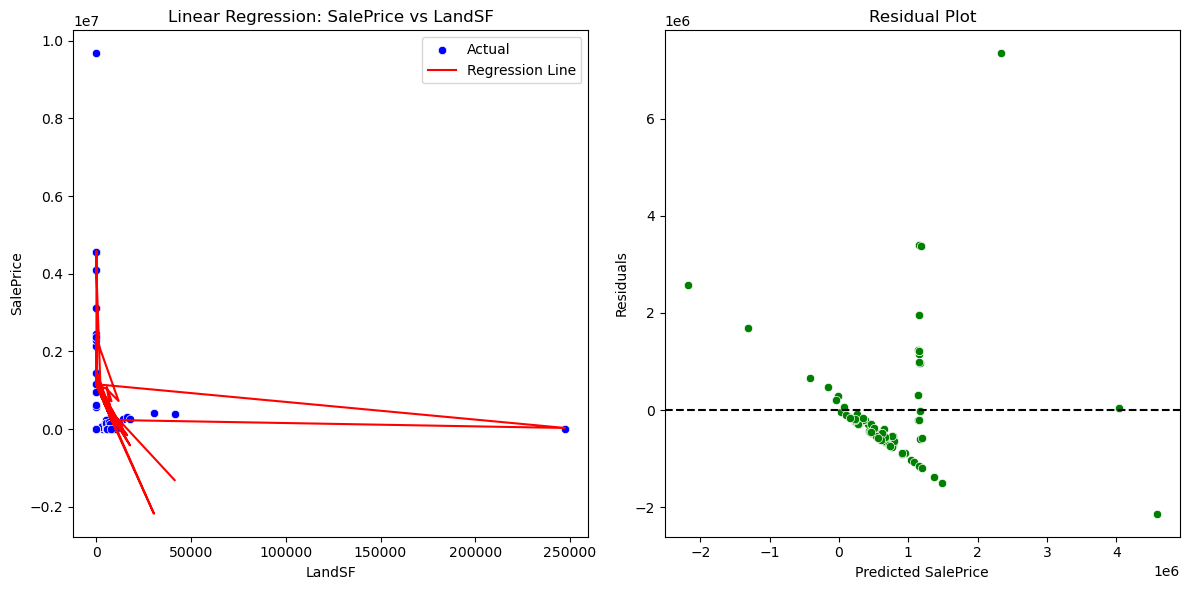

In [88]:
# Handle missing values for numeric columns using mean
numeric_cols = sample_df.select_dtypes(include=[np.number]).columns
sample_df[numeric_cols] = sample_df[numeric_cols].fillna(sample_df[numeric_cols].mean())

# Handle missing values for non-numeric columns using mode (most frequent value)
non_numeric_cols = sample_df.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_cols:
    sample_df[col] = sample_df[col].fillna(sample_df[col].mode()[0])

# Now continue with the rest of your analysis
# Define target variable (SalePrice) and predictor variables (LandSF, TotalFinishedArea)
X = sample_df[['LandSF', 'TotalFinishedArea']]
y = sample_df['SalePrice']

# Create the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict SalePrice using the model
y_pred = model.predict(X)

# Get the coefficients (slope) and intercept of the regression line
intercept = model.intercept_
coefficients = model.coef_

# Print the linear regression equation
print(f"Linear Regression Equation: SalePrice = {intercept:.2f} + ({coefficients[0]:.2f} * LandSF) + ({coefficients[1]:.2f} * TotalFinishedArea)")

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot the regression line for SalePrice vs LandSF (for visualization)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=sample_df['LandSF'], y=y, color='blue', label='Actual')
plt.plot(sample_df['LandSF'], y_pred, color='red', label='Regression Line')
plt.xlabel('LandSF')
plt.ylabel('SalePrice')
plt.title('Linear Regression: SalePrice vs LandSF')
plt.legend()

# Plot the residuals
residuals = y - y_pred
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals, color='green')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Question 5

In [95]:
# Fill missing values as we did earlier (mean for numeric, mode for non-numeric)
numeric_cols = sample_df.select_dtypes(include=[np.number]).columns
sample_df[numeric_cols] = sample_df[numeric_cols].fillna(sample_df[numeric_cols].mean())

non_numeric_cols = sample_df.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_cols:
    sample_df[col] = sample_df[col].fillna(sample_df[col].mode()[0])

# Define target variable (SalePrice) and predictor variables
y = sample_df['SalePrice']

# Model 1: Only LandSF and TotalFinishedArea
X1 = sample_df[['LandSF', 'TotalFinishedArea']]
X1 = sm.add_constant(X1)  # Adds a constant term (intercept)
model1 = sm.OLS(y, X1).fit()

# Model 2: Here we Add more variables 
# Assuming additional predictors like 'TotalAppraisedValue' and 'xrSalesValidityID'
X2 = sample_df[['LandSF', 'TotalFinishedArea', 'TotalAppraisedValue', 'xrSalesValidityID']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

# Model 3: Apply regularization (Lasso regression)
from sklearn.linear_model import Lasso
X3 = sample_df[['LandSF', 'TotalFinishedArea', 'TotalAppraisedValue', 'xrSalesValidityID']]
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X3_train, y_train)
y_pred_lasso = lasso.predict(X3_test)

# Model 1 - Summary of results
print("Model 1 (LandSF, TotalFinishedArea) Summary:")
print(model1.summary())

# Model 2 - Summary of results
print("\nModel 2 (LandSF, TotalFinishedArea, TotalAppraisedValue, xrSalesValidityID) Summary:")
print(model2.summary())

# Model 3 - R2 and Adjusted R2 for Lasso regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = lasso.score(X3_test, y_test)
print(f"\nModel 3 (Lasso Regression) - Mean Squared Error: {mse_lasso:.4f}")
print(f"Model 3 (Lasso Regression) - R-squared: {r2_lasso:.4f}")

# Adjusted R2 for each model
adj_r2_model1 = 1 - (1 - model1.rsquared) * (len(y) - 1) / (len(y) - X1.shape[1] - 1)
adj_r2_model2 = 1 - (1 - model2.rsquared) * (len(y) - 1) / (len(y) - X2.shape[1] - 1)

print(f"\nAdjusted R-squared for Model 1: {adj_r2_model1:.4f}")
print(f"Adjusted R-squared for Model 2: {adj_r2_model2:.4f}")
print(f"Adjusted R-squared for Model 3: {r2_lasso:.4f}")

Model 1 (LandSF, TotalFinishedArea) Summary:
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     17.53
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           3.16e-07
Time:                        22:56:33   Log-Likelihood:                -1546.2
No. Observations:                 100   AIC:                             3098.
Df Residuals:                      97   BIC:                             3106.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

C:\Users\omusi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.256e+13, tolerance: 1.874e+10
  model = cd_fast.enet_coordinate_descent(
